In [20]:
#Import PyTorch and Torchvision
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor
import time
import matplotlib.pyplot as plt

In [4]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:14<00:00, 1768445.16it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 206268.42it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:04<00:00, 888912.07it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 9106822.86it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

"""
Label : Class
0     : T-shirt/top
1     : Trouser
2     : Pullover
3     : Dress
4     : Coat
5     : Sandal
6     : Shirt
7     : Sneaker
8     : Bag
9     : Ankle boot
"""

"""
N = Number of samples (batch size)
C = Channels (e.g. 1 for greyscale, 3 for RGB)
H = Height
W = Width

(X, y) = (Batch, label)
"""
for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [8]:
print(len(training_data))
print(len(test_data))

60000
10000


In [55]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


model = NeuralNetwork().to(device)
print(model)

input = torch.randn(32, 3, 6, 5)
# With default parameters
m = nn.Flatten()
output = m(input)
print(output.size())

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
torch.Size([32, 90])


In [56]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

In [34]:
def train(dataloader, model, loss_fn, optimizer):
    t_start = time.time()
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
    print(f"Time taken:{time.time()-t_start:>3f}")

In [15]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [57]:
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.313816  [    0/60000]
loss: 2.299150  [ 6400/60000]
loss: 2.283891  [12800/60000]
loss: 2.274398  [19200/60000]
loss: 2.262117  [25600/60000]
loss: 2.240898  [32000/60000]
loss: 2.244499  [38400/60000]
loss: 2.219732  [44800/60000]
loss: 2.219955  [51200/60000]
loss: 2.178020  [57600/60000]
Time taken:9.189900
Test Error: 
 Accuracy: 42.9%, Avg loss: 2.181597 

Epoch 2
-------------------------------
loss: 2.194744  [    0/60000]
loss: 2.184637  [ 6400/60000]
loss: 2.135582  [12800/60000]
loss: 2.150284  [19200/60000]
loss: 2.107780  [25600/60000]
loss: 2.058655  [32000/60000]
loss: 2.086025  [38400/60000]
loss: 2.018768  [44800/60000]
loss: 2.020298  [51200/60000]
loss: 1.953285  [57600/60000]
Time taken:9.362414
Test Error: 
 Accuracy: 55.7%, Avg loss: 1.952191 

Epoch 3
-------------------------------
loss: 1.980146  [    0/60000]
loss: 1.955283  [ 6400/60000]
loss: 1.848087  [12800/60000]
loss: 1.886513  [19200/60000]
loss: 1.786207  

Predicted: "Ankle boot", Actual: "Ankle boot"
Predicted: "Pullover", Actual: "Pullover"
Predicted: "Trouser", Actual: "Trouser"
Predicted: "Trouser", Actual: "Trouser"
Predicted: "Pullover", Actual: "Shirt"


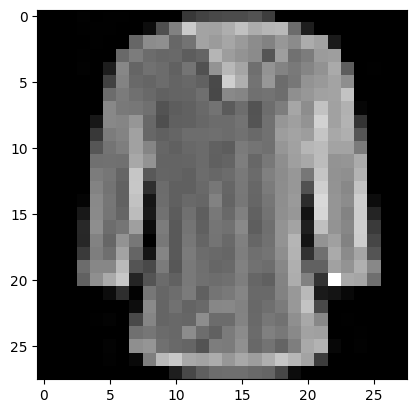

Predicted: "Trouser", Actual: "Trouser"
Predicted: "Shirt", Actual: "Coat"


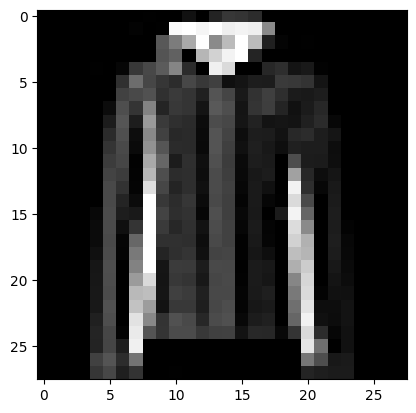

Predicted: "Coat", Actual: "Shirt"


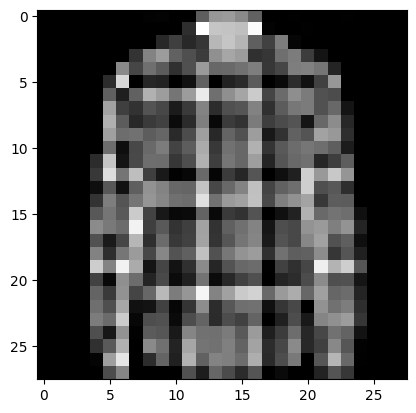

Predicted: "Sneaker", Actual: "Sandal"


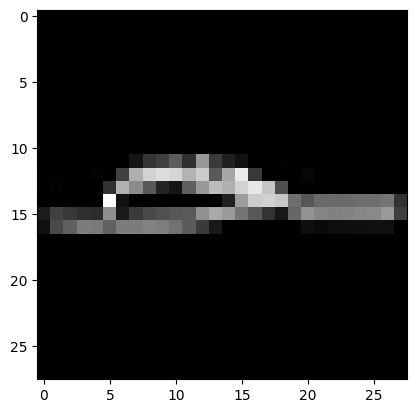

Predicted: "Sneaker", Actual: "Sneaker"
Predicted: "Coat", Actual: "Coat"
Predicted: "Sneaker", Actual: "Sandal"


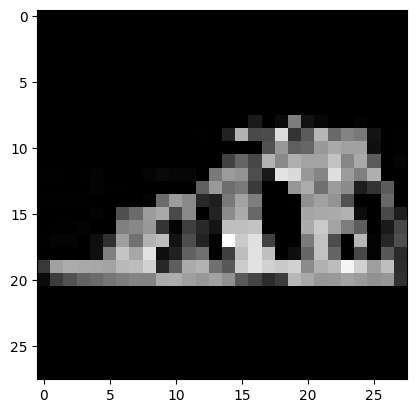

Predicted: "Sneaker", Actual: "Sneaker"
Predicted: "Dress", Actual: "Dress"
Predicted: "Coat", Actual: "Coat"
Predicted: "Trouser", Actual: "Trouser"
Predicted: "Pullover", Actual: "Pullover"
Predicted: "Pullover", Actual: "Coat"


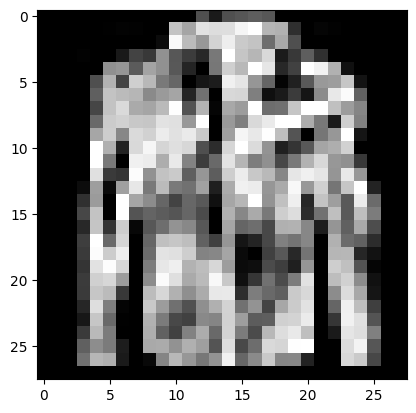

Predicted: "Bag", Actual: "Bag"
Predicted: "T-shirt/top", Actual: "T-shirt/top"


In [58]:
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]
model.eval()
#for i in range(len(test_data)):
for i in range(20):
    x, y = test_data[i][0], test_data[i][1]
    with torch.no_grad():
        pred = model(x)
        predicted, actual = classes[pred[0].argmax(0)], classes[y]
        print(f'Predicted: "{predicted}", Actual: "{actual}"')
        if predicted != actual:
            plt.imshow(test_data[i][0].squeeze(), cmap="gray")
            plt.show()

In [59]:
# Save our model
state_dict = model.state_dict()
print(state_dict)

OrderedDict([('linear_relu_stack.0.weight', tensor([[-3.3111e-02, -3.0740e-03,  7.7058e-03,  ..., -4.4476e-03,
         -1.2376e-02,  2.2189e-02],
        [-6.2343e-03,  2.0351e-02, -2.9910e-02,  ...,  3.2074e-02,
          6.9793e-04, -2.8745e-02],
        [-2.4301e-02,  6.1459e-05,  1.3372e-02,  ...,  9.7774e-04,
         -1.5044e-02,  3.4880e-02],
        ...,
        [-6.4236e-03,  2.8850e-02,  3.0031e-02,  ...,  3.1148e-02,
          3.2866e-02, -1.9543e-03],
        [ 2.1641e-02,  3.5261e-03, -2.5276e-02,  ...,  3.4838e-02,
         -2.0815e-02,  1.0988e-03],
        [-2.0549e-02,  2.0540e-02,  1.5273e-02,  ..., -6.2947e-03,
          9.7409e-03,  2.6166e-02]])), ('linear_relu_stack.0.bias', tensor([ 3.0777e-02,  3.3961e-02, -1.6125e-02,  1.9033e-03, -5.1246e-03,
        -1.3821e-02, -1.5857e-02, -2.4367e-02, -1.1730e-02,  1.5777e-02,
        -2.1294e-02,  1.2809e-02,  1.0527e-02, -3.4206e-03,  6.4138e-03,
         3.4658e-02,  3.0997e-02, -1.7300e-02, -8.4750e-03,  1.2306e-02,
 

In [60]:
# torch.save(object, filename). For the filename, any extension can be used
torch.save(state_dict, "our_model.pt")
y = torch.load("our_model.pt")
print(y)

OrderedDict([('linear_relu_stack.0.weight', tensor([[-3.3111e-02, -3.0740e-03,  7.7058e-03,  ..., -4.4476e-03,
         -1.2376e-02,  2.2189e-02],
        [-6.2343e-03,  2.0351e-02, -2.9910e-02,  ...,  3.2074e-02,
          6.9793e-04, -2.8745e-02],
        [-2.4301e-02,  6.1459e-05,  1.3372e-02,  ...,  9.7774e-04,
         -1.5044e-02,  3.4880e-02],
        ...,
        [-6.4236e-03,  2.8850e-02,  3.0031e-02,  ...,  3.1148e-02,
          3.2866e-02, -1.9543e-03],
        [ 2.1641e-02,  3.5261e-03, -2.5276e-02,  ...,  3.4838e-02,
         -2.0815e-02,  1.0988e-03],
        [-2.0549e-02,  2.0540e-02,  1.5273e-02,  ..., -6.2947e-03,
          9.7409e-03,  2.6166e-02]])), ('linear_relu_stack.0.bias', tensor([ 3.0777e-02,  3.3961e-02, -1.6125e-02,  1.9033e-03, -5.1246e-03,
        -1.3821e-02, -1.5857e-02, -2.4367e-02, -1.1730e-02,  1.5777e-02,
        -2.1294e-02,  1.2809e-02,  1.0527e-02, -3.4206e-03,  6.4138e-03,
         3.4658e-02,  3.0997e-02, -1.7300e-02, -8.4750e-03,  1.2306e-02,
 